In [1]:
from sklearn import datasets
mnist = datasets.load_digits()


In [2]:
X=mnist['data']
X.shape

(1797, 64)

In [3]:
y=mnist['target']
y.shape

(1797,)

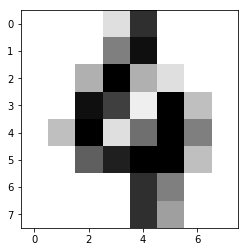

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[100] 
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show()

In [7]:
y[100]

4

In [8]:
X_train, X_test, y_train, y_test = X[:1348], X[1348:], y[:1348], y[1348:]

In [9]:
#shuffling the training set
import numpy as np
shuffle_index = np.random.permutation(1348)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
#training a binary classifier
y_train_4 = (y_train == 4)#True for all 4s, False for all other digits
y_test_4 = (y_test == 4)

In [11]:
#Creating a Stochastic Gradient Descent(SGD) classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guessed that this image represents 4(True).

# Measuring accuracy using Cross-Validation

In [13]:
#using cross_val_score() function to evaluate SGDClassifier model using
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
#here cv = 3 i.e. k = 3 meaning, training set is split into 3 folds.
cross_val_score(sgd_clf, X_train, y_train_4, cv = 3, scoring = "accuracy" )

C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.99555556, 0.96436526, 0.99777283])

Accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

# Confusion Matrix

To know the number of times the classifier confused
images of 4s with 3s, you would look in the 4th row and 3rd column of the confusion
matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they
can be compared to the actual targets.

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3)
print(y_train_4.sum())#total no. of 4s in training target
print(y_train_pred.sum())#total no. of 4s correctly predicted


133
150


C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\nikmh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[1197,   18],
       [   1,  132]], dtype=int64)

<ul>
    <li>each row in confusion matrix = actual class</li>
    <li>each column = predicted class</li>
    <li>first row is non -4 images(negative class) </li>
    <ol>
        <li>1214 were correctly classified as non -4s(true negatives)</li>
        <li>1 was wrongly classified as 4s(false positives)</li>
    </ol><br>
    <li>second row is the images of 4s(positive class)</li>
    <ol>
        <li>4 were wrongly classified as non -4s(false negatives)</li>
        <li>129 were correctly classified as 4s(true positives)</li>
    </ol>       
</ul>
<p>[[TN, FP]<br>
    [FN, TP]]</p>
<p> Accuracy of the positive predictions
 is called the precision of the classifier</p>
<p> Precision = TP / (TP + FP)</p>
<p> Recall/ Sensitivity/ True Positive Rate(TPR) = TP/(TP + FN)</p>

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.88

<p style = "font-size: 20px">When it claims an image represents 4, it is correct only 88% of time.</p>

In [19]:
recall_score(y_train_4, y_train_pred)

0.9924812030075187

<p style = "font-size: 20px">It detects 99.2% of the 4s.</p>
<p> Combination of both precision and recall is calle F1 score which is the harmonic mean of precision and recall.</p>
<p> F1 = 2[(precision * recall)/(precision + recall)] = TP/[TP + (FN + FP)/2]

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_pred)

0.9328621908127207